In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [4]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  c:\RAI\latest\fairness-variance


# Visualizations

In [5]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [6]:
DB_COLLECTION_NAME = 'eq_odds_postprocessing'
DATASET_NAME = 'Folktables_GA_2018_Income'
EXPERIMENT_SESSION_UUID = "3cd57b4b-2226-4f9e-9ff9-398ebe58e111"
SENSITIVE_ATTRS = ['SEX', "RAC1P", "SEX&RAC1P"]
MODEL_NAMES = ['RandomForestClassifier']

In [7]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [8]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [9]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(150, 33)

In [11]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(5)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-19 21:29:05.224,3cd57b4b-2226-4f9e-9ff9-398ebe58e111,Exp_iter_1,100,...,NaN,NaN,0.823611,NaN,NaN,0.796154,NaN,NaN,0.809333,0
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-19 21:47:04.676,3cd57b4b-2226-4f9e-9ff9-398ebe58e111,Exp_iter_1,100,...,1.0,0.0,0.826389,1.0,0.0,0.803846,1.0,0.0,0.814667,0
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 07:09:31.511,3cd57b4b-2226-4f9e-9ff9-398ebe58e111,Exp_iter_4,400,...,NaN,NaN,0.830579,NaN,NaN,0.794574,NaN,NaN,0.812000,0
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 07:10:16.850,3cd57b4b-2226-4f9e-9ff9-398ebe58e111,Exp_iter_3,300,...,NaN,NaN,0.817427,NaN,NaN,0.776062,NaN,NaN,0.796000,0
4,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 07:11:50.130,3cd57b4b-2226-4f9e-9ff9-398ebe58e111,Exp_iter_5,500,...,NaN,NaN,0.811749,NaN,NaN,0.798935,NaN,NaN,0.805333,0


In [12]:
df = models_metrics_dct[list(models_metrics_dct.keys())[0]]
df[(df.Metric == 'Accuracy') & (df.Experiment_Iteration == 'Exp_iter_1')].T

,0,1
Metric,Accuracy,Accuracy
Model_Name,RandomForestClassifier,RandomForestClassifier
Model_Params,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
Dataset_Name,Folktables_GA_2018_Income,Folktables_GA_2018_Income
Num_Estimators,200,200
Tag,OK,OK
Record_Create_Date_Time,2023-11-19 21:29:05.224000,2023-11-19 21:47:04.676000
Session_Uuid,3cd57b4b-2226-4f9e-9ff9-398ebe58e111,3cd57b4b-2226-4f9e-9ff9-398ebe58e111
Experiment_Iteration,Exp_iter_1,Exp_iter_1
Dataset_Split_Seed,100,100


In [13]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [14]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 1) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
221,Label_Stability,Exp_iter_1,0.999160
221,Label_Stability,Exp_iter_4,0.999133
221,Label_Stability,Exp_iter_3,0.951387
221,Label_Stability,Exp_iter_5,0.999213
221,Label_Stability,Exp_iter_2,0.998580


In [17]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 0) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
331,Label_Stability,Exp_iter_1,0.898140
331,Label_Stability,Exp_iter_4,0.908553
331,Label_Stability,Exp_iter_3,0.904807
331,Label_Stability,Exp_iter_5,0.903787
331,Label_Stability,Exp_iter_2,0.898413


In [18]:
melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"]= melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"].astype(bool)

<Figure size 1200x600 with 0 Axes>

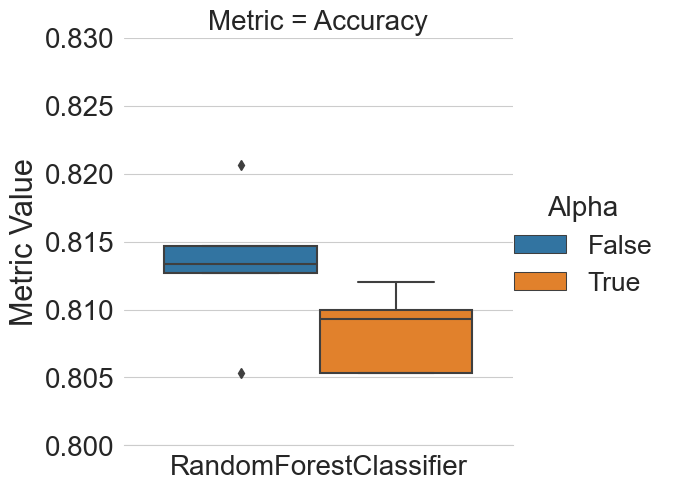

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.8, 0.83),
                                           metric_names=['Accuracy'],
                                           )

<Figure size 1200x600 with 0 Axes>

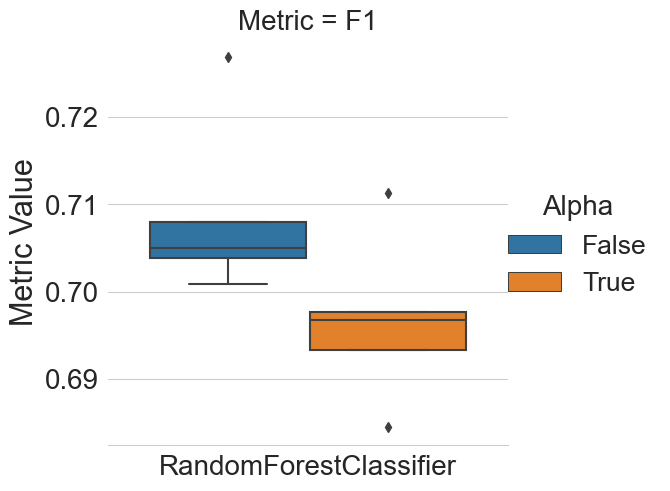

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.40, 0.525),
                                           metric_names=['F1'],
                                           )

<Figure size 1200x600 with 0 Axes>

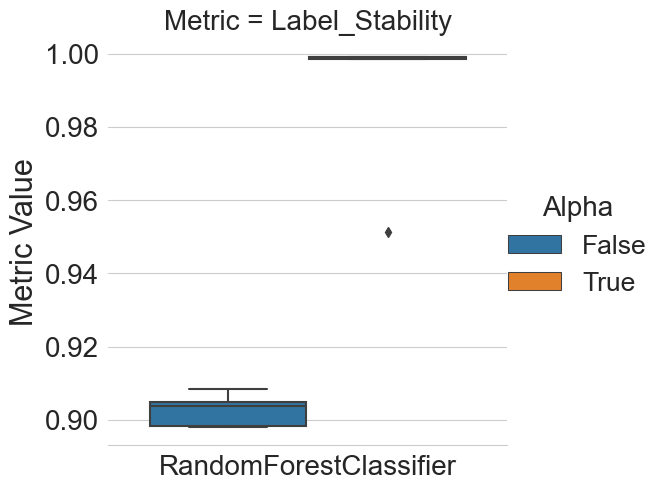

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.925, 1.005),
                                           metric_names=['Label_Stability'])

<Figure size 1200x600 with 0 Axes>

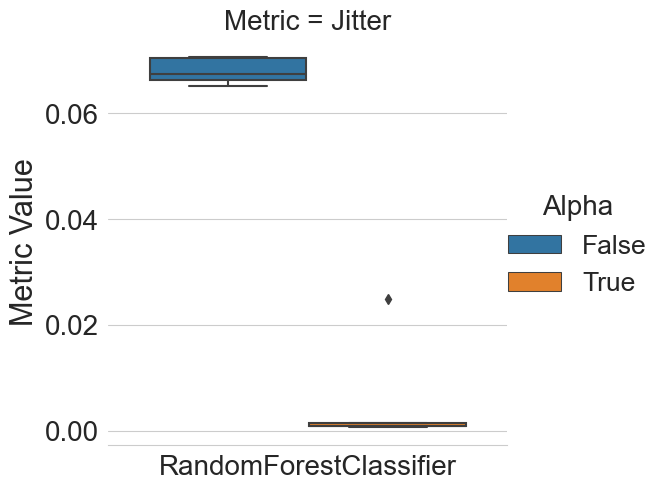

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.925, 1.005),
                                           metric_names=['Jitter'])

<Figure size 1200x600 with 0 Axes>

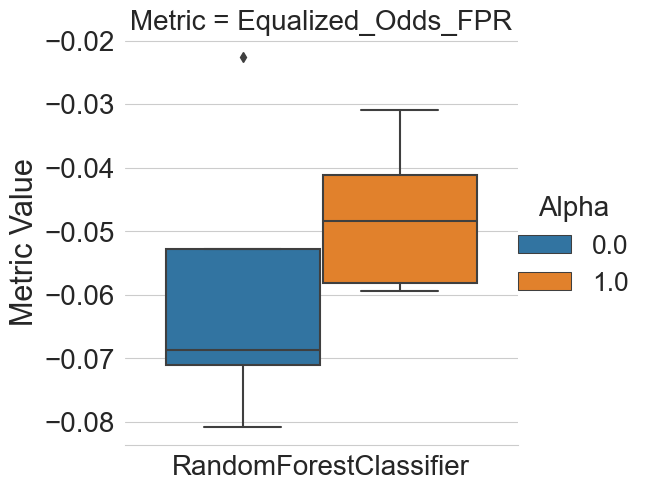

In [23]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR'])

<Figure size 1200x600 with 0 Axes>

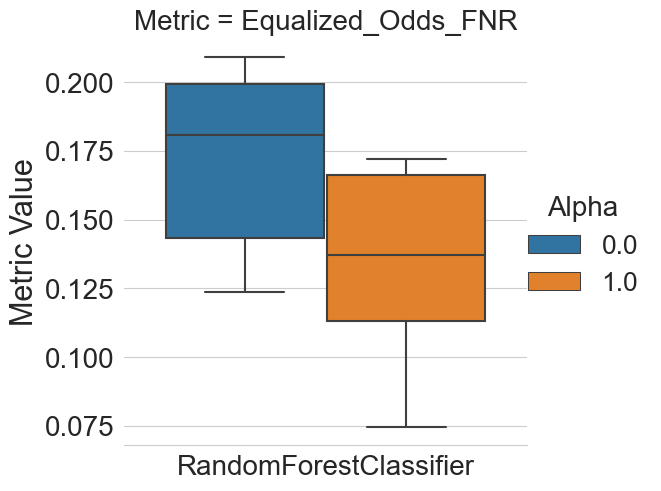

In [24]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FNR'])

<Figure size 1200x600 with 0 Axes>

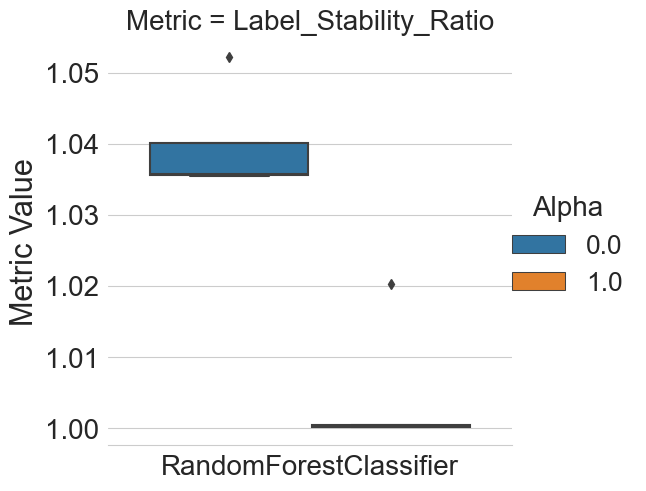

In [25]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Label_Stability_Ratio'])